## Linear algebra w/ numpy

In [13]:
import numpy as np
r1 = np.array([1,2,1])
r2 = np.array([4,1,5])
r3 = np.array([6,8,6])

In [14]:
print(r1, r2, r3, sep="\n")

[1 2 1]
[4 1 5]
[6 8 6]


In [15]:
x1 = np.matrix(r1)
x2 = np.matrix(r2)
x3 = np.matrix(r3)


In [16]:
X = np.concatenate((x1, x2, x3), axis = 0)
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

In [17]:
X_inverse = X.getI()
X_inverse

matrix([[-8.5000000e+00, -1.0000000e+00,  2.2500000e+00],
        [ 1.5000000e+00, -7.6861594e-17, -2.5000000e-01],
        [ 6.5000000e+00,  1.0000000e+00, -1.7500000e+00]])

In [18]:
X_inverse = np.round(X_inverse, 2)
X_inverse

array([[-8.5 , -1.  ,  2.25],
       [ 1.5 , -0.  , -0.25],
       [ 6.5 ,  1.  , -1.75]])

## Ordinary Least Squares

In [22]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = [0,1], parse_dates = True)


# BEcause we want to have a cross-joined table of all years for all countries,
# use this algorithm to get an array of new indicies.


years = np.array(sorted(list(set(data.index.get_level_values("Year")))))

years = pd.date_range(years[0], years[-2], freq = "AS")

countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))

index_names = list(data.index.names)

multi_index = pd.MultiIndex.from_product([countries, years[:-1]], names = data.index.names)

data = data.reindex(multi_index)


In [23]:
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  
         2015-01-01           1560.0  

[7452 rows x 7 columns]

In [24]:
# Note this creates an issue when we drop nas; the lag for 1980 would lookback to 1975, which would be wrong.
data.dropna(axis=0).loc['GBR']

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita
Year,,,,,,,
1970-01-01,5.873943,3.627407,7.124264,7.635725,4.215819,7.335440,16829.0
1975-01-01,5.815599,3.025033,7.402758,5.079569,6.454499,6.853485,18517.0
1980-01-01,6.449941,3.981471,6.249600,5.956992,8.953345,6.933140,20211.0
1985-01-01,7.401115,4.652913,5.903596,9.345015,9.004900,8.167404,22139.0
1990-01-01,7.939640,5.961256,6.862864,9.475603,9.008930,8.478812,25679.0
1995-01-01,8.076496,5.718541,7.848163,9.600114,9.079635,8.091002,27447.0
2000-01-01,8.518925,7.194097,8.248599,9.311339,9.367495,8.473096,31619.0
2001-01-01,8.452018,6.961156,8.234602,9.520818,9.231009,8.312506,32356.0
2002-01-01,8.490705,7.139978,8.144261,9.484984,9.161324,8.522978,32992.0


In [25]:
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()
#Shift  = lag; can add parameters for number of rows to lag...

In [26]:
data.columns

Index(['EFW', 'Size of Government', 'Legal System & Property Rights',
       'Sound Money', 'Freedom to trade internationally', 'Regulation',
       'RGDP Per Capita', 'RGDP Per Capita Lag'],
      dtype='object')

In [27]:
y_var = ["RGDP Per Capita"]
x_vars = ['Size of Government', 'Legal System & Property Rights',
       'Sound Money', 'Freedom to trade internationally', 'Regulation']
reg_vars = y_var + x_vars
reg_vars

['RGDP Per Capita',
 'Size of Government',
 'Legal System & Property Rights',
 'Sound Money',
 'Freedom to trade internationally',
 'Regulation']

In [31]:
reg_data = data[reg_vars].dropna(how="any", axis=0)
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           5136.0            4.652865   
         2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  
ISO_Code Year                                                      
AGO      2005-01-01                          6.218266    4.729310  
         2006-01-01                          6.158949    5.306135  
         2007-01-01                          6.115462    5.524626  
         2008-01-01                          5.687976    5.221726  
         2009-01-01                          5.811844    5.011598  
...                                               ...         ...  
ZWE      2011-01-01                          5.366773    4.372878  
         2012-01-01                          5.132305    3.661438  
         2013-01-01                          5.589087    3.848068  
         2014-01-01                          5.909121    3.987721  
         2015-01-01                          5.679719    6.643620  

[2579 rows x 6 columns]

In [32]:
reg_data.corr()

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
RGDP Per Capita,1.000000,-0.178519,0.650046,0.415628,0.469285,0.482856
Size of Government,-0.178519,1.000000,-0.101515,0.198122,0.241506,0.207653
Legal System & Property Rights,0.650046,-0.101515,1.000000,0.523091,0.629035,0.594026
Sound Money,0.415628,0.198122,0.523091,1.000000,0.679034,0.597976
Freedom to trade internationally,0.469285,0.241506,0.629035,0.679034,1.000000,0.646460
Regulation,0.482856,0.207653,0.594026,0.597976,0.646460,1.000000


In [33]:
reg_data.describe().round(3)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
count,2579.000,2579.000,2579.000,2579.000,2579.000,2579.000
mean,17014.473,6.347,5.226,7.757,6.902,6.655
std,18238.813,1.235,1.742,1.852,1.522,1.170
min,523.000,1.573,0.991,0.000,0.000,2.102
25%,3993.500,5.521,3.956,6.741,6.181,5.928
50%,10970.000,6.416,5.171,8.115,7.149,6.751
75%,24312.000,7.184,6.351,9.319,7.975,7.475
max,156029.000,9.514,9.138,9.887,10.000,9.443


In [34]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"]=1
results = sm.OLS(y, X).fit()


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     459.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:46:11   Log-Likelihood:                -28139.
No. Observations:                2579   AIC:                         5.629e+04
Df Residuals:                    2573   BIC:                         5.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2997.6106    236.584    -12.670      0.000   -3461.524   -2533.697
Legal System & Property Rights    4607.1830    220.959     20.851      0.000    4173.908    5040.458
Sound Money                        642.4200    201.692      3.185      0.001     246.924    1037.916
Freedom to trade internationally  1071.2569    279.150      3.838      0.000     523.875    1618.638
Regulation                        2602.3488    323.519      8.044      0.000    1967.966    3236.732
Constant                         -1.774e+04   1855.445     -9.558      0.000   -2.14e+04   -1.41e+04
==============================================================================
Omnibus:                     2141.407   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78528.598
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           5136.0            4.652865   
         2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor  
ISO_Code Year                                   
AGO      2005-01-01                2603.907858  
         2006-01-01                5603.204806  
         2007-01-01                6792.601968  
         2008-01-01                6105.621665  
         2009-01-01                 290.800835  
...                                        ...  
ZWE      2011-01-01                 944.453909  
         2012-01-01                -760.305239  
         2013-01-01                 210.228904  
         2014-01-01                1463.939767  
         2015-01-01                9301.393871  

[2579 rows x 7 columns]

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

In [42]:
y = reg_data[y_var[0]]
y_name = y_var[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_var[0]].mean()

### WHAT is .sub command?   SUBTRACT!
# .pow = exponent; power, etc.


reg_data["Residuals"] = (y_hat.sub(y_mean))
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

y_hat

ISO_Code  Year      
AGO       2005-01-01    2603.907858
          2006-01-01    5603.204806
          2007-01-01    6792.601968
          2008-01-01    6105.621665
          2009-01-01     290.800835
                           ...     
ZWE       2011-01-01     944.453909
          2012-01-01    -760.305239
          2013-01-01     210.228904
          2014-01-01    1463.939767
          2015-01-01    9301.393871
Name: RGDP Per Capita Predictor, Length: 2579, dtype: float64

In [45]:
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

print("R2", SSR/SST)

R2 0.47187361419986534


In [46]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE/ (n-k)

n, k, estimator_variance

(2579.0, 6, 176024920.179195)

In [48]:
cov_matrix = results.cov_params()
cov_matrix

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Constant
Size of Government,55971.839907,19985.283083,-3210.007361,-16033.443310,-13425.959550,-2.347572e+05
Legal System & Property Rights,19985.283083,48822.833978,-4689.138911,-23636.666405,-23245.951675,-2.776749e+04
Sound Money,-3210.007361,-4689.138911,40679.806245,-22123.549791,-15045.073804,-1.785027e+04
Freedom to trade internationally,-16033.443310,-23636.666405,-22123.549791,77924.718718,-20195.859397,-6.537109e+03
Regulation,-13425.959550,-23245.951675,-15045.073804,-20195.859397,104664.223028,-2.337718e+05
Constant,-234757.228213,-27767.488186,-17850.266337,-6537.109329,-233771.810176,3.442675e+06


In [49]:
### CAlc T-stats

In [52]:
parameters = {}
for x_var in X.keys():
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Std. Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t_stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Std. Error"] 
    
parameters = pd.DataFrame(parameters).T
parameters    
    
    

,Beta,Std. Error,t_stats
Size of Government,-2997.610594,236.583685,-12.670403
Legal System & Property Rights,4607.183029,220.958897,20.850860
Sound Money,642.419977,201.692355,3.185148
Freedom to trade internationally,1071.256861,279.149993,3.837567
Regulation,2602.348828,323.518505,8.043895
Constant,-17735.249440,1855.444650,-9.558490


In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     459.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:14:46   Log-Likelihood:                -28139.
No. Observations:                2579   AIC:                         5.629e+04
Df Residuals:                    2573   BIC:                         5.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2997.6106    236.584    -12.670      0.000   -3461.524   -2533.697
Legal System & Property Rights    4607.1830    220.959     20.851      0.000    4173.908    5040.458
Sound Money                        642.4200    201.692      3.185      0.001     246.924    1037.916
Freedom to trade internationally  1071.2569    279.150      3.838      0.000     523.875    1618.638
Regulation                        2602.3488    323.519      8.044      0.000    1967.966    3236.732
Constant                         -1.774e+04   1855.445     -9.558      0.000   -2.14e+04   -1.41e+04
==============================================================================
Omnibus:                     2141.407   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78528.598
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualizing residuals

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

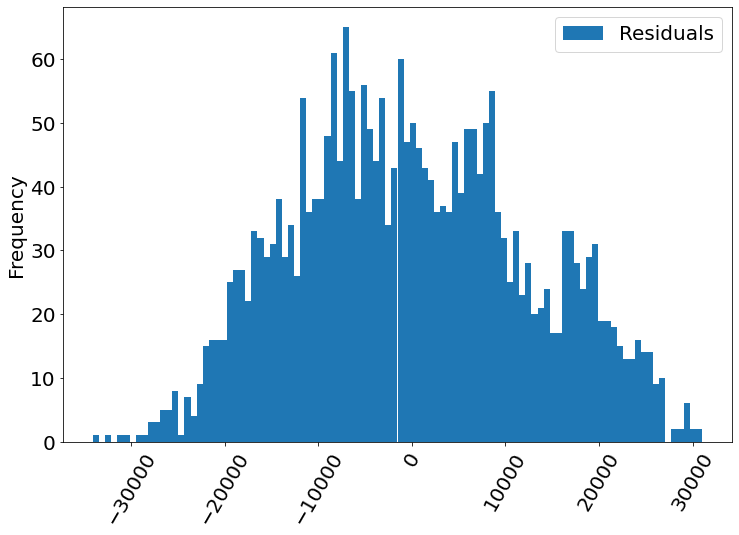

In [56]:
import matplotlib.pyplot  as plt

plt.rcParams.update({"font.size":20})

fig, ax = plt.subplots(figsize = (12,8))

reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

plt.xticks(rotation=60)

## Residuals as plotted above is not normal; 
Normalize the data by looking at percent of chagne.

In [ ]:
## READ About joint F-test in book; this is related to adding a constant to the regression.